<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e5/TensorFlow_Logo_with_text.png/800px-TensorFlow_Logo_with_text.png" width=200 align="right">

# 4.2 Machine Learning - TensorFlow

Una de les llibreries més populars dedicades a [Machine Learning](https://ca.wikipedia.org/wiki/Aprenentatge_autom%C3%A0tic) i [Intel·ligència Artificial](https://ca.wikipedia.org/wiki/Intel%C2%B7lig%C3%A8ncia_artificial) és **[TensorFlow](https://www.tensorflow.org/)**. 
<br> Desenvolupada per Google, és de codi obert i és especialment adequada per a la construcció de **xarxes neurals profundes**. En aquesta activitat en veurem algun exemple senzill. Es nom de la llibreria prové del mot **[tensor](https://ca.wikipedia.org/wiki/Tensor)**, un array de dades **multidimensional** similar als arrays de NumPy que hem vist.Són immutables i moltes llibreries com TensorFlow o [PyTorch](https://pytorch.org/) ofereixen acceleració de GPU per a operar amb ells.

Per facilitar-nos la vida, farem servir una API per TensorFlow anomenada **[Keras](https://keras.io/)**. Fa d'interfície de TensorFlow ens facilitarà la creació i intrenament de xarxes neurals. 
 
 

### 1. Creació d'un entorn de *conda* amb tensorflow
Creem un entorn nou on hi instal·larem la llibreria tensorflow.

```bash
conda create -n tensorflow python=3.7
conda activate tensorflow

conda install keras
conda install conda-forge::tensorflow
```

Per fer-ho servir des de jupyter lab ens cal afegir el nou entorn com a kernel:
```bash
conda install ipykernel
python -m ipykernel install --user --name tensorflow
```
Si no tenim jupyte lab ja instal·lat en algun altre entorn:
```bash
conda install -c conda-forge jupyterlab
```

També farem servir les llibreries *matplotlib* i  *seaborn* per fer alguns gràfics:
```bash
conda install -c conda-forge matplotlib
conda install seaborn
```

<mark> **Pregunta 1**: Què és i què fa la llibreria *seaborn* que acabem d'instal·lar ? </mark>

És una eina per a la visualització de dades basada en Matplotlib. S'ha dissenyat específicament per a la creació de gràfics estadístics atractius i informatius.
Seaborn simplifica la creació de gràfics comuns, com ara gràfics de dispersió, histogrames, gràfics de barres, gràfics de caixa i molts altres, amb una sintaxi clara i intuïtiva. També ofereix funcions per a la visualització de relacions estadístiques complexes, com ara gràfics de regressió lineal, gràfics de relació i matrices de correlació.
Una de les grans avantatges de Seaborn és la seva integració amb Pandas.

Importem les llibreris que farem servir.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from matplotlib import pyplot as plt
import seaborn as sns
from PIL import Image

C:\Users\300034\AppData\Local\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\300034\AppData\Local\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\300034\AppData\Local\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\3

### 2. Preparació de les dades.

Un set de dades habitual per començar a jugar amb xarxes neurals és el [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset. Consisteix en una sèrie d'imatges de nombres escrits a ma. <br> TensorFlow té un mètode per descarregar-lo ja separat entre el train set i test set.

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Cada un dels elements del set representa una imatge de 28 x 28 pixels que representa una xifra en escala de grisos, essent 0 blanc i 255 negre. <br>
Per exemple, si mirem el primer element del training set:




<AxesSubplot:>

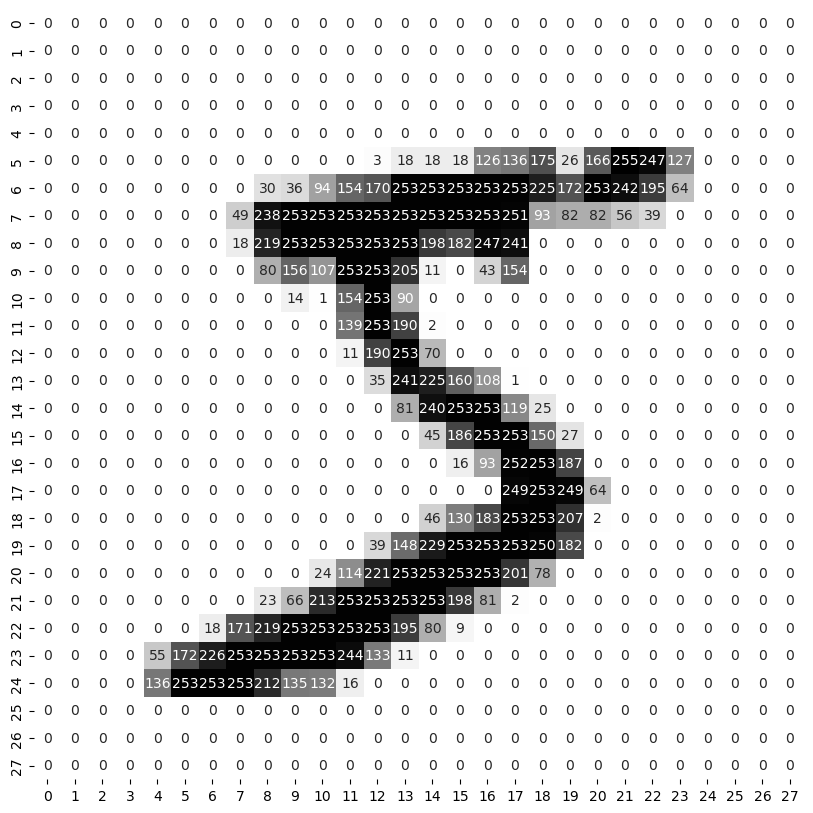

In [3]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(x_train[0], square=True, annot=True, cbar=False, fmt="g", cmap="binary")

Si no ens cal veure les xifres de cada píxel podem mostrar les imatges de forma més fàcil amb matplotlib:

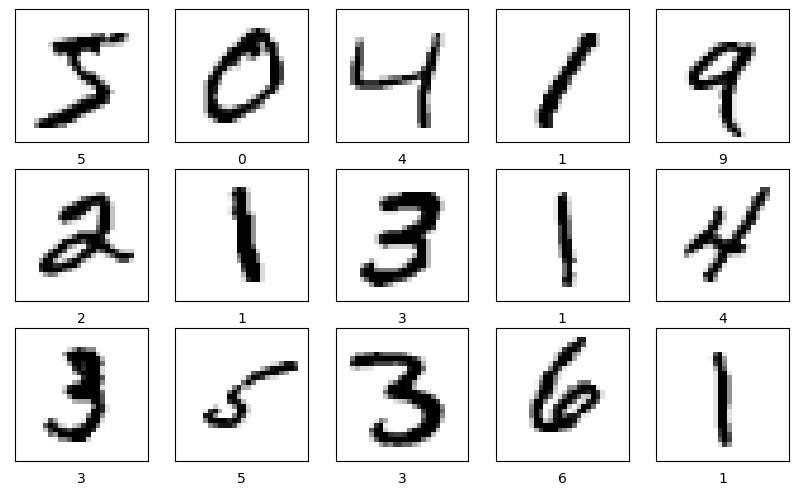

In [4]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='binary')
    plt.xlabel(y_train[i])
plt.show()

Exploreu una mica les dades les set MNIST i responeu a les preguntes següents

<mark> **Pregunta 2**: Quantes imatges hi ha en el training set ? I en el test set ? Entre els dos sets, quantes n'hi ha per a cada nombre? </mark>

In [6]:
# Nombre d'imatges en el conjunt d'entrenament
num_images_train = x_train.shape[0]

# Nombre d'imatges en el conjunt de prova
num_images_test = x_test.shape[0]

# Imprimir els resultats
print("Nombre d'imatges en el conjunt d'entrenament:", num_images_train)
print("Nombre d'imatges en el conjunt de prova:", num_images_test)

Nombre d'imatges en el conjunt d'entrenament: 60000
Nombre d'imatges en el conjunt de prova: 10000


In [5]:
# Comptar el nombre d'imatges per a cada nombre en el conjunt d'entrenament
train_counts = np.bincount(y_train)

# Comptar el nombre d'imatges per a cada nombre en el conjunt de prova
test_counts = np.bincount(y_test)

# Imprimir els resultats
print("Distribució d'imatges per a cada nombre en el conjunt d'entrenament:")
for i, count in enumerate(train_counts):
    print(f"Número {i}: {count} imatges")

print("\nDistribució d'imatges per a cada nombre en el conjunt de prova:")
for i, count in enumerate(test_counts):
    print(f"Número {i}: {count} imatges")

Distribució d'imatges per a cada nombre en el conjunt d'entrenament:
Número 0: 5923 imatges
Número 1: 6742 imatges
Número 2: 5958 imatges
Número 3: 6131 imatges
Número 4: 5842 imatges
Número 5: 5421 imatges
Número 6: 5918 imatges
Número 7: 6265 imatges
Número 8: 5851 imatges
Número 9: 5949 imatges

Distribució d'imatges per a cada nombre en el conjunt de prova:
Número 0: 980 imatges
Número 1: 1135 imatges
Número 2: 1032 imatges
Número 3: 1010 imatges
Número 4: 982 imatges
Número 5: 892 imatges
Número 6: 958 imatges
Número 7: 1028 imatges
Número 8: 974 imatges
Número 9: 1009 imatges


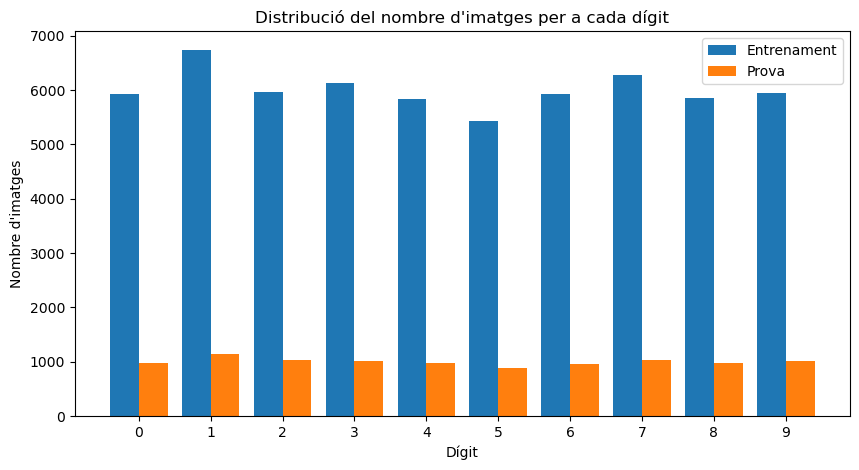

In [28]:
import matplotlib.pyplot as plt

# Nombre d'imatges per a cada nombre en el conjunt d'entrenament
train_counts = np.bincount(y_train)

# Nombre d'imatges per a cada nombre en el conjunt de prova
test_counts = np.bincount(y_test)

# Nombres dels dígits (0 a 9)
digits = np.arange(10)

# Creació del gràfic de barres
plt.figure(figsize=(10, 5))

plt.bar(digits - 0.2, train_counts, width=0.4, label='Entrenament')
plt.bar(digits + 0.2, test_counts, width=0.4, label='Prova')

plt.xlabel('Dígit')
plt.ylabel('Nombre d\'imatges')
plt.title('Distribució del nombre d\'imatges per a cada dígit')
plt.xticks(digits)
plt.legend()

plt.show()


En general, les xarxes neurals funciones millor si les dades d'entrada estan **escalades** entre 0 i 1. <br> Com hem comprovat, ara mateix els valors de les dades van de 0 a 255.

<mark> **Pregunta 3**: Escaleu les dades d'entrada tant del set d'entrenament com del de test per tal que els seus valors vagin de 0 a 1 </mark>

In [10]:
# Aquest codi divideix cada valor de píxel de les imatges en els conjunts d'entrenament i de prova per 255.0, que és el valor màxim de píxel. 
# Això normalitza els valors de píxel perquè estiguin en el rang de 0 a 1.

# Escalar les dades d'entrada del conjunt d'entrenament
x_train_scaled = x_train / 255.0
# print("Dades escalades d'entrada del conjunt d'entrenament:");
# Escalar les dades d'entrada del conjunt de prova
x_test_scaled = x_test / 255.0
# print("Dades escalades d'entrada del conjunt de prova:");
# print(x_test_scaled);

### 3. Construcció del model.
Creem amb Keras una xarxa neural senzilla, amb una sola capa de 128 neurones intermitja entre l'entrada i la sortida.

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


La capa de **Dropout** contribueix a evitar **l'overfitting** tallant a l'atzar la connexió d'una part de les neurones (20% en aquest cas) amb la capa següent. Fixeu-vos que fem servir la funció d'activació [ReLu](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) en les neurones.


<mark> **Pregunta 4**: Per què el tamany de les capes d'entrada i sortida són 784 i 10, respectivament ?</mark>



El tamany de la capa d'entrada és 784 perquè cada imatge en el conjunt de dades MNIST té una mida de 28x28 píxels, i la capa `Flatten` transforma aquesta matriu d'imatge 2D en un vector unidimensional de longitud 784 (28x28 = 784). Aquest vector s'utilitza com a entrada per a la primera capa de neurones.

El tamany de la capa de sortida és 10 perquè el conjunt de dades MNIST conté imatges de dígits escrits a mà, cada una associada a una de les 10 categories (dígits del 0 al 9). Per tant, volem que la xarxa neuronal produeixi una distribució de probabilitat sobre aquestes 10 categories. La capa de sortida consta de 10 neurones, on cada neurona representa una categoria i produeix una puntuació associada a aquesta categoria. En la fase d'entrenament, aquestes puntuacions són convertides en probabilitats mitjançant una funció softmax per a la classificació final del dígit.

Les xarxes neurals s'entrenen **optimitzant** els seus parametres interns, això requereix una funció que calculi l'error del model anomenada **loss function** i una functió que faci l'optimització.

In [12]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

Finalment entrenem el model amb el set d'entrenament. En cada una de les èpoques d'entrenament s'utilitzen tots els elements del set d'entrenament per optimitzar els paràmetres de la xarxa.

In [13]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 42us/sample - loss: 2.6496 - acc: 0.7533 - val_loss: 0.4993 - val_acc: 0.8849
Epoch 2/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.5819 - acc: 0.8464 - val_loss: 0.3590 - val_acc: 0.9118
Epoch 3/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4831 - acc: 0.8707 - val_loss: 0.3127 - val_acc: 0.9298
Epoch 4/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4140 - acc: 0.8894 - val_loss: 0.2919 - val_acc: 0.9340
Epoch 5/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3966 - acc: 0.8971 - val_loss: 0.2736 - val_acc: 0.9391


Finalment queda avaluar el model amb el test set:

In [14]:
model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 0s - loss: 0.2736 - acc: 0.9391


[0.2736101111928001, 0.9391]

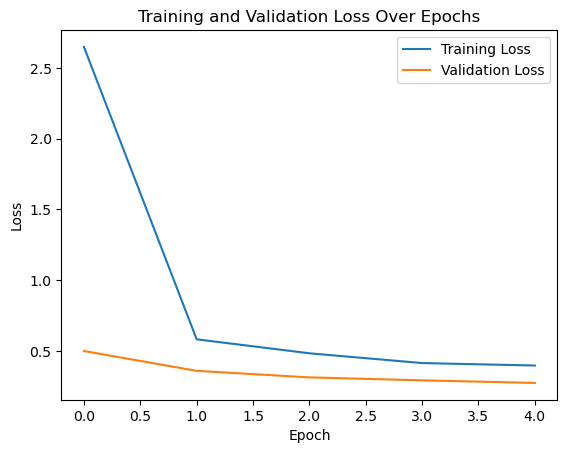

In [15]:
# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

### 4. Aplicació del model.
Per fer una predicció amb el model ja entrenat podem fer servir el mètode `predict()`. Ens retornarà el valor de sortida per a cada una de les neurones de la última capa. Podem agafar el més alt per quedar-nos amb la predicció de la classificació.

In [16]:
out = model.predict(x_train[0].reshape((1,28,28)))
print(out)
print(out.argmax())

[[25.103361 50.72054  42.80836  73.66744  33.900112 82.489044 35.67001
   8.349036 48.552986 59.966026]]
5


Si volem classificar imatges noves, ens cal convertir-les primer en un array igual que hem fet servir per construir el model. 

In [17]:
def image2input(infile, draw=False):
    picture = Image.open(infile).convert('L')
    picture = picture.resize((28, 28))
    picture = np.array(picture)
    picture = 255 - picture
    picture = picture / 255
    
    return picture

<mark> **Pregunta 5**: Al moodle hi teniu un joc d'imatges de xifres fetes a mà per nosaltres i fotografiades. Comproveu si el model és capaç de detectar correctament quina és la xifra escrita en cada cas. <mark> 

També podeu provar-ho amb imatges generades per vosaltres. Tingueu en compte però, que per què el model funcioni les imatges han de ser similars a les imatges amb que s'ha entrenat el model.

   

In [21]:
# Funció per carregar una imatge i convertir-la en un array d'entrada per al model
def image2input(infile, draw=False):
    picture = Image.open(infile).convert('L')
    picture = picture.resize((28, 28))
    picture = np.array(picture)
    picture = 255 - picture
    picture = picture / 255
    return picture

# Ruta de l'arxiu d'imatge a provar
image_file = "C:/Users/300034/Desktop/MachineLearning/XarxesNeuronals_amb_TensorFlow/numbers/numbers/2.png"

# Carrega de l'imatge i transformació en un array d'entrada
input_image = image2input(image_file)

# Fes una predicció amb el model
prediction = model.predict(input_image.reshape((1, 28, 28)))

# Imprimeix la predicció
print("Predicció:", prediction.argmax())

Predicció: 8


### 5. Xarxes Neurals Convolucionals

El model que hem vist és força senzill i el set de dades prou limitat. Les [xarxes neurals convolucionals](https://ca.wikipedia.org/wiki/Xarxa_neuronal_convolucional) són una variació de les xarxes neurals ordinàries i són especialment adequades per al reconeixement d'imatges. En veurem un exemple amb un altre set de dades disponible a Keras. En aquest cas l'objectiu del model és classificar imatges en diferents categories segons el seu contingut.

In [22]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 8s 0us/step


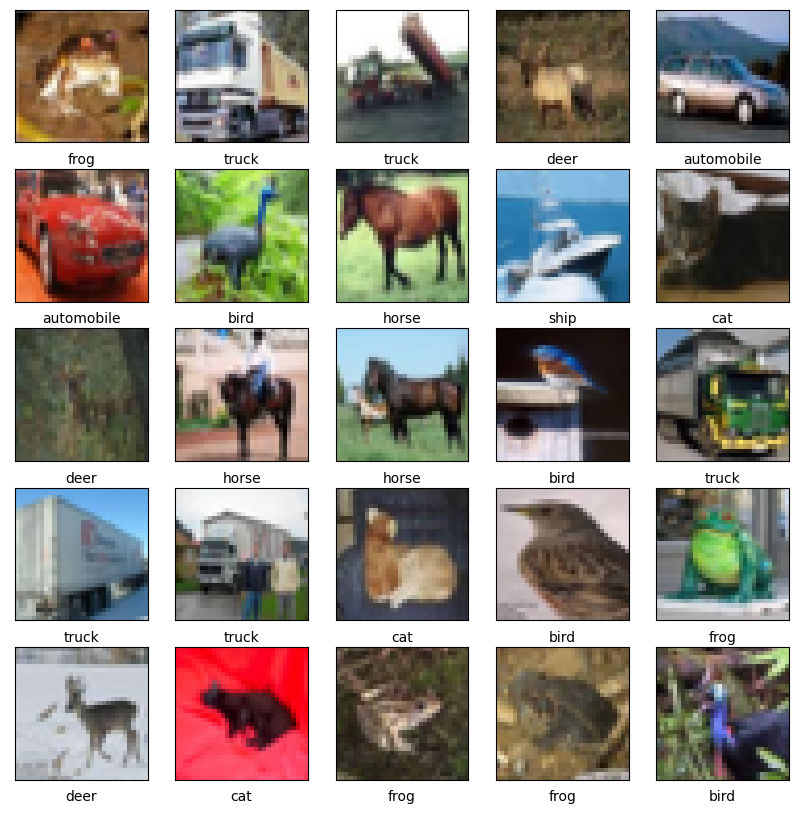

In [23]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

En aquest cas les imatges són de 32x32 píxels i en color (RGB), de manera que cada una d'elles es pot representar amb un array o tensor de 32x32x3 

In [24]:
train_images[0].shape

(32, 32, 3)

Com abans n'escalem els valors per a què vagin de 0 a 1 i construïm el model. És una xarxa més complicada amb més capes que tardarà força més a entrenar-se.

In [25]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [26]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 27s 533us/sample - loss: 1.5329 - acc: 0.4408 - val_loss: 1.2898 - val_acc: 0.5395
Epoch 2/10
50000/50000 [==============================] - 27s 536us/sample - loss: 1.1678 - acc: 0.5852 - val_loss: 1.1171 - val_acc: 0.5991
Epoch 3/10
50000/50000 [==============================] - 27s 537us/sample - loss: 1.0116 - acc: 0.6464 - val_loss: 0.9718 - val_acc: 0.6584
Epoch 4/10
50000/50000 [==============================] - 27s 531us/sample - loss: 0.9115 - acc: 0.6813 - val_loss: 0.9471 - val_acc: 0.6683
Epoch 5/10
50000/50000 [==============================] - 27s 531us/sample - loss: 0.8406 - acc: 0.7087 - val_loss: 0.9191 - val_acc: 0.6814
Epoch 6/10
50000/50000 [==============================] - 27s 534us/sample - loss: 0.7822 - acc: 0.7248 - val_loss: 0.8708 - val_acc: 0.6997
Epoch 7/10
50000/50000 [==============================] - 27s 540us/sample - loss: 0.7303 - acc: 0.7449 

Un tipus de gràfic molt útil per veure com ha anat l'entrenament de la xarxa neural és dibuixar l'exactitud del model en els sets de test i d'entrenament a mida que aquest avança. En aquest cas hem arribat a una exactitud propera al 70%.

In [29]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/10000 - 2s - loss: 0.8892 - acc: 0.7050


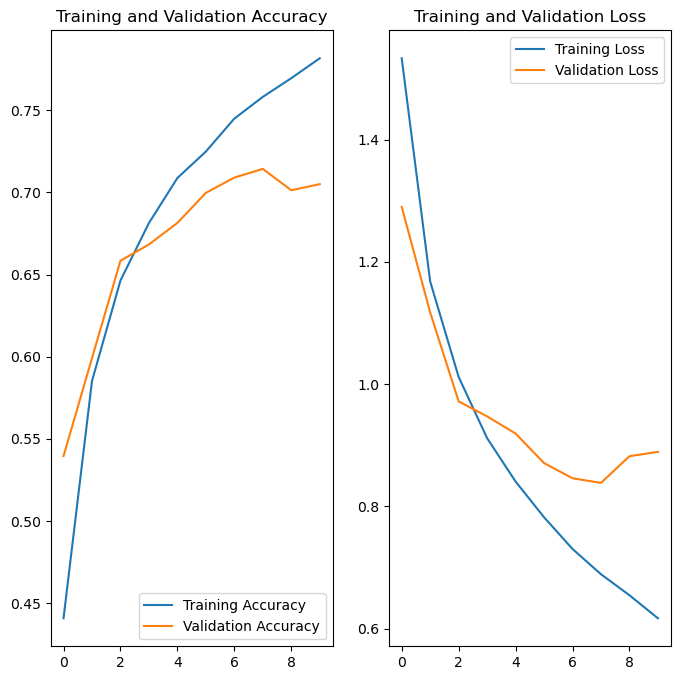

In [30]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<mark> **Pregunta 6**: Cerqueu algunes imatges a google i comproveu com funciona el model. Quantes pot classificar correctament ? . </mark>

In [37]:
def image2input(infile, draw=False):
    picture = Image.open(infile).convert("RGB")
    picture = picture.resize((32, 32))
    picture = np.array(picture)
    picture = picture / 255
    return picture

input_image = image2input("C:/Users/300034/Desktop/MachineLearning/XarxesNeuronals_amb_TensorFlow/caball.png") 

# Fes una predicció amb el model
prediction = model.predict(input_image.reshape((1, 32, 32, 3)))

# Obtenir la classe predita
predicted_class = np.argmax(prediction)

# Imprimir la classe predita
print("Classe predita:", class_names[predicted_class])

Classe predita: horse


Adaptat de:

* https://www.tensorflow.org/datasets/keras_example
* https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
* https://www.tensorflow.org/tutorials/images/cnn
